iteracion: 0   w= 0.005   loss = 0.447
iteracion: 50   w= 0.213   loss = 0.359
iteracion: 100   w= 0.364   loss = 0.312
iteracion: 150   w= 0.473   loss = 0.288
iteracion: 200   w= 0.552   loss = 0.275
iteracion: 250   w= 0.609   loss = 0.269
iteracion: 300   w= 0.651   loss = 0.265
iteracion: 350   w= 0.680   loss = 0.263
iteracion: 400   w= 0.702   loss = 0.262
iteracion: 450   w= 0.718   loss = 0.262
iteracion: 500   w= 0.729   loss = 0.262
iteracion: 550   w= 0.737   loss = 0.261
iteracion: 600   w= 0.743   loss = 0.261
iteracion: 650   w= 0.747   loss = 0.261
iteracion: 700   w= 0.751   loss = 0.261
iteracion: 750   w= 0.753   loss = 0.261
iteracion: 800   w= 0.754   loss = 0.261
iteracion: 850   w= 0.756   loss = 0.261
iteracion: 900   w= 0.756   loss = 0.261
iteracion: 950   w= 0.757   loss = 0.261
prediction after training tensor([0.7197, 0.4563, 0.4347, 0.6741, 0.2028, 0.3927, 0.6623, 0.1079, 0.2405,
        0.4053, 0.5642, 0.1051, 0.0751, 0.0628, 0.4474],
       grad_fn=<MulB

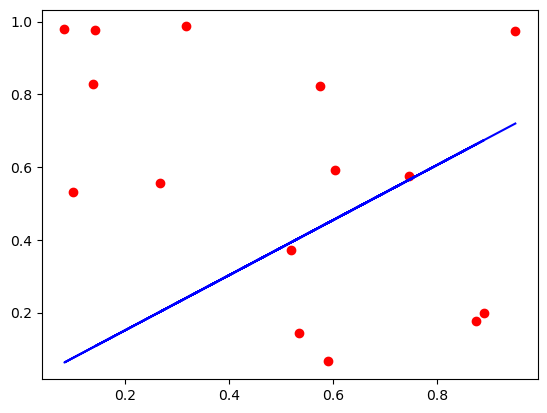

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

X = torch.rand(15, dtype = torch.float32)
Y = torch.rand(15, dtype = torch.float32)

w = torch.tensor(0, dtype = torch.float32, requires_grad= True)

# model prediction
def forward(x):
    return w*x


learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()

    #zero the gradients
    optimizer.zero_grad()

    if epoch % 50 == 0:
        print(f'iteracion: {epoch}   w= {w:.3f}   loss = {l.mean():.3f}')

print(f'prediction after training {y_pred} y origonal {Y}')
print(f'w after training {w}')   

predicted = forward(X).detach().numpy()
plt.plot(X.detach().numpy(),Y.detach().numpy(), 'ro')
plt.plot(X.detach().numpy(),predicted, 'b')
plt.show()

In [2]:
%matplotlib notebook
%matplotlib inline
#pip install ipympl
# reiniciar VSC si no funciona


%matplotlib widget


número de variables independientes 2 y número de observaciones 12
iteracion: 0   w0= 0.304 w1= 0.457  loss = 51.113
iteracion: 10   w0= 0.770 w1= 0.759  loss = 7.503
iteracion: 20   w0= 0.819 w1= 0.685  loss = 7.087
iteracion: 30   w0= 0.827 w1= 0.642  loss = 6.767
iteracion: 40   w0= 0.818 w1= 0.611  loss = 6.477
iteracion: 50   w0= 0.803 w1= 0.587  loss = 6.205
iteracion: 60   w0= 0.785 w1= 0.565  loss = 5.949
iteracion: 70   w0= 0.767 w1= 0.545  loss = 5.707
iteracion: 80   w0= 0.748 w1= 0.525  loss = 5.479
iteracion: 90   w0= 0.730 w1= 0.506  loss = 5.263
prediction after training tensor([[4.0846],
        [5.7836],
        [6.9910],
        [5.2492],
        [8.3800],
        [6.7666],
        [9.1387],
        [3.1015],
        [5.5592],
        [5.0677],
        [5.0249],
        [4.5333]], grad_fn=<AddmmBackward0>) y origonal tensor([[5.],
        [6.],
        [7.],
        [8.],
        [5.],
        [6.],
        [8.],
        [7.],
        [4.],
        [8.],
        [6.],


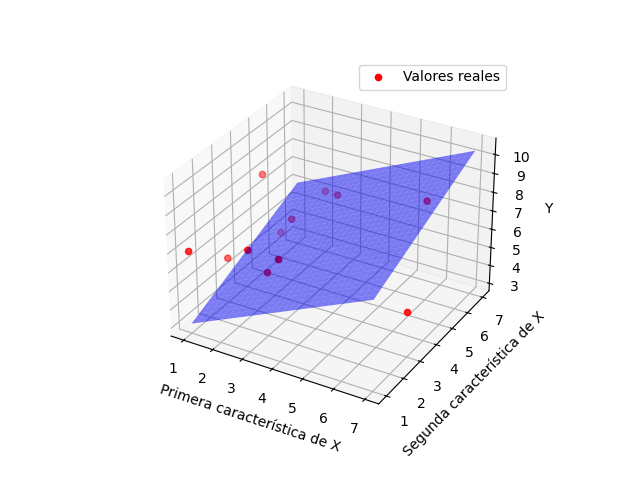

In [3]:
import torch
import torch.nn as nn


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D plotting

X = torch.tensor([[1, 3], [2, 5], [3, 6], [4, 1],[7, 3], [2, 7], [6, 6], [1, 1],[1, 6], [1, 5], [3, 2], [3, 1]], dtype = torch.float32)
Y = torch.tensor([[5], [6], [7], [8],[5], [6], [8], [7],[4], [8], [6], [8]], dtype = torch.float32)
# Each value is wrapped in its own list, making it a column vector

n_samples, n_features = X.shape

# This line retrieves the shape of tensor X. The shape attribute returns a tuple representing the dimensions of the tensor.
# n_samples will be assigned the number of rows in X, which is 4 (the number of samples).
# n_features will be assigned the number of columns in X, which is 1 (the number of features).


print(f'número de variables independientes {n_features} y número de observaciones {n_samples}')


input_size = n_features
output_size = Y.shape[1]  # Y.shape[1] gives the number cof columns in Y, which is 1 in this case.

# model = nn.Linear(input_size,output_size)
# nn.Linear: This is a class from the torch.nn module that creates a linear transformation layer. 
# A linear layer performs a linear transformation on the input data, which can be mathematically represented as:
# y=Ax+b


class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
            super(LinearRegression, self).__init__()
            # define layers 
            self.lin =  nn.Linear(input_dim, output_dim)

    def forward(self,x):
         return self.lin(x)

model = LinearRegression(input_size, output_size)



learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer.zero_grad

# training loop
# -foward pass: compute prediction
# -backward pass: gradients
# -update weights

for epoch in range(n_iters):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    #zero the gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'iteracion: {epoch}   w0= {w[0][0].item():.3f} w1= {w[0][1].item():.3f}  loss = {l.item():.3f}')

print(f'prediction after training {y_pred} y origonal {Y}')
print(f'w shape {w.shape} after training {w} and b {b}')   

# Convertir tensores a numpy para matplotlib
X_np = X.detach().numpy()
Y_np = Y.detach().numpy()
predicted_np = model(X).detach().numpy()

# Crear una malla para la superficie de predicción
x1 = np.linspace(X_np[:, 0].min(), X_np[:, 0].max(), 30)
x2 = np.linspace(X_np[:, 1].min(), X_np[:, 1].max(), 30)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)

# Aplanar la malla para pasar al modelo
x_mesh_flat = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
x_mesh_tensor = torch.tensor(x_mesh_flat, dtype=torch.float32)

# Obtener predicciones para la malla
y_mesh_pred = model(x_mesh_tensor).detach().numpy()
y_mesh_pred = y_mesh_pred.reshape(x1_mesh.shape)

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos reales en rojo
ax.scatter(X_np[:, 0], X_np[:, 1], Y_np[:, 0], color='red', label='Valores reales')

# Malla de predicción en azul semitransparente
ax.plot_surface(x1_mesh, x2_mesh, y_mesh_pred, color='blue', alpha=0.5)

ax.set_xlabel('Primera característica de X')
ax.set_ylabel('Segunda característica de X')
ax.set_zlabel('Y')

ax.legend()

plt.show()


